In [20]:
%matplotlib widget

import os  
import sys  
sys.path.insert(0, os.getenv('HOME')+'/pycode/MscThesis/')
from pymatreader import read_mat
from scipy import sparse
import numpy as np
import os
from datetime import datetime, timedelta
import pandas
from amftrack.pipeline.functions.extract_graph import from_sparse_to_graph, generate_nx_graph, sparse_to_doc
import cv2
import json
import pandas as pd
from amftrack.pipeline.paths.directory import *
from amftrack.util.sys import *
from amftrack.notebooks.post_processing.util import *
import pickle
from joblib import Parallel, delayed
from datetime import datetime



In [21]:
directory = directory_project
update_analysis_info(directory)
analysis_info = get_current_analysis(directory)

In [22]:
# select = analysis_info.loc[analysis_info['PrincePos']==39]
select = analysis_info.loc[analysis_info['version']=='Version3']
select


,folder_analysis,version,Plate,PrincePos,root,strain,medium,split,Temp,CrossDate,date,Pbait,date_begin,date_end,number_timepoints,path_exp,path_analysis_info,date_run_analysis
2,Analysis_1635767978669512387_Version3,Version3,792,21,Carrot,A5,001P100N,Y,None,20210915,"18.09.2021, 17:29:",-,20210915_1518_Plate21,20210927_2108_Plate21,100,Analysis_1635767978669512387_Version3/experime...,Analysis_1635767978669512387_Version3/static_i...,"01.11.2021, 12:59:"
4,Analysis_1635759934556241870_Version3,Version3,22,29,Carrot,A5,001P100N,Y,None,20210107,"12.01.2021, 11:20:",-,20210107_1119_Plate29,20210112_2320_Plate29,31,Analysis_1635759934556241870_Version3/experime...,Analysis_1635759934556241870_Version3/static_i...,"01.11.2021, 10:45:"
6,Analysis_1635760070797997734_Version3,Version3,80,36,Carrot,A5,001P100N,Y,None,20201127,"03.12.2020, 09:55:",-,20201128_1802_Plate36,20201206_2113_Plate36,47,Analysis_1635760070797997734_Version3/experime...,Analysis_1635760070797997734_Version3/static_i...,"01.11.2021, 10:47:"
7,Analysis_1635760274677883352_Version3,Version3,799,39,Carrot,A5,001P100N,Y,None,20211001,"05.10.2021, 01:48:",-,20211001_1620_Plate39,20211011_1227_Plate39,95,Analysis_1635760274677883352_Version3/experime...,Analysis_1635760274677883352_Version3/static_i...,"01.11.2021, 10:51:"
8,Analysis_1635760863750781562_Version3,Version3,26,39,Carrot,A5,001P100N,Y,None,20210104,"10.01.2021, 03:23:",-,20210106_1122_Plate30,20210113_2325_Plate30,44,Analysis_1635760863750781562_Version3/experime...,Analysis_1635760863750781562_Version3/static_i...,"01.11.2021, 11:01:"
14,Analysis_1635759954623773008_Version3,Version3,10,36,Carrot,A5,001P100N,Y,None,20210107,"11.01.2021, 15:33:",-,20210107_1140_Plate36,20210112_2333_Plate36,31,Analysis_1635759954623773008_Version3/experime...,Analysis_1635759954623773008_Version3/static_i...,"01.11.2021, 10:45:"
15,Analysis_1635760966175950154_Version3,Version3,152,32,Carrot,A5,001P100N,Y,None,20201224,"30.12.2020, 19:26:",-,20201224_1139_Plate32,20210103_0725_Plate32,60,Analysis_1635760966175950154_Version3/experime...,Analysis_1635760966175950154_Version3/static_i...,"01.11.2021, 11:02:"
16,Analysis_1635760920116282417_Version3,Version3,91,37,Carrot,A5,001P100N,Y,None,20201217,"26.12.2020, 07:42:",-,20201217_1611_Plate37,20210103_1529_Plate37,100,Analysis_1635760920116282417_Version3/experime...,Analysis_1635760920116282417_Version3/static_i...,"01.11.2021, 11:02:"
23,Analysis_1635760068794326366_Version3,Version3,88,17,Carrot,A5,001P100N,Y,None,20210915,"22.09.2021, 23:13:",-,20210915_1507_Plate17,20210923_2112_Plate17,100,Analysis_1635760068794326366_Version3/experime...,Analysis_1635760068794326366_Version3/static_i...,"01.11.2021, 10:47:"
26,Analysis_1635762023572375519_Version3,Version3,76,38,Carrot,A5,001P100N,Y,None,20210108,"10.01.2021, 11:44:",-,20210108_1143_Plate38,20210112_2337_Plate38,25,Analysis_1635762023572375519_Version3/experime...,Analysis_1635762023572375519_Version3/static_i...,"01.11.2021, 11:20:"


In [19]:
time = '10:00'
directory = directory_project
list_f = [get_length,get_area, get_num_tips,get_num_nodes]
list_args= [{}]*len(list_f)
overwrite = True
num_parallel = 10
run_parallel_post('exp_plot.py', list_f,list_args,[directory,overwrite],select, num_parallel, time,'post_process',cpus = 128)

Submitted batch job 55187
Submitted batch job 55188


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


In [12]:
select

,folder_analysis,version,Plate,PrincePos,root,strain,medium,split,Temp,CrossDate,date,Pbait,date_begin,date_end,number_timepoints,path_exp,path_analysis_info,date_run_analysis
3,Analysis_1635759934556241870_Version3,Version3,22,29,Carrot,A5,001P100N,Y,None,20210107,"12.01.2021, 11:20:",-,20210107_1119_Plate29,20210112_2320_Plate29,31,Analysis_1635759934556241870_Version3/experime...,Analysis_1635759934556241870_Version3/static_i...,"01.11.2021, 10:45:"
5,Analysis_1635760070797997734_Version3,Version3,80,36,Carrot,A5,001P100N,Y,None,20201127,"03.12.2020, 09:55:",-,20201128_1802_Plate36,20201206_2113_Plate36,47,Analysis_1635760070797997734_Version3/experime...,Analysis_1635760070797997734_Version3/static_i...,"01.11.2021, 10:47:"
6,Analysis_1635760274677883352_Version3,Version3,799,39,Carrot,A5,001P100N,Y,None,20211001,"05.10.2021, 01:48:",-,20211001_1620_Plate39,20211011_1227_Plate39,95,Analysis_1635760274677883352_Version3/experime...,Analysis_1635760274677883352_Version3/static_i...,"01.11.2021, 10:51:"
7,Analysis_1635760863750781562_Version3,Version3,26,39,Carrot,A5,001P100N,Y,None,20210104,"10.01.2021, 03:23:",-,20210106_1122_Plate30,20210113_2325_Plate30,44,Analysis_1635760863750781562_Version3/experime...,Analysis_1635760863750781562_Version3/static_i...,"01.11.2021, 11:01:"
13,Analysis_1635759954623773008_Version3,Version3,10,36,Carrot,A5,001P100N,Y,None,20210107,"11.01.2021, 15:33:",-,20210107_1140_Plate36,20210112_2333_Plate36,31,Analysis_1635759954623773008_Version3/experime...,Analysis_1635759954623773008_Version3/static_i...,"01.11.2021, 10:45:"
14,Analysis_1635760966175950154_Version3,Version3,152,32,Carrot,A5,001P100N,Y,None,20201224,"30.12.2020, 19:26:",-,20201224_1139_Plate32,20210103_0725_Plate32,60,Analysis_1635760966175950154_Version3/experime...,Analysis_1635760966175950154_Version3/static_i...,"01.11.2021, 11:02:"
15,Analysis_1635760920116282417_Version3,Version3,91,37,Carrot,A5,001P100N,Y,None,20201217,"26.12.2020, 07:42:",-,20201217_1611_Plate37,20210103_1529_Plate37,100,Analysis_1635760920116282417_Version3/experime...,Analysis_1635760920116282417_Version3/static_i...,"01.11.2021, 11:02:"
22,Analysis_1635760068794326366_Version3,Version3,88,17,Carrot,A5,001P100N,Y,None,20210915,"22.09.2021, 23:13:",-,20210915_1507_Plate17,20210923_2112_Plate17,100,Analysis_1635760068794326366_Version3/experime...,Analysis_1635760068794326366_Version3/static_i...,"01.11.2021, 10:47:"
25,Analysis_1635762023572375519_Version3,Version3,76,38,Carrot,A5,001P100N,Y,None,20210108,"10.01.2021, 11:44:",-,20210108_1143_Plate38,20210112_2337_Plate38,25,Analysis_1635762023572375519_Version3/experime...,Analysis_1635762023572375519_Version3/static_i...,"01.11.2021, 11:20:"
30,Analysis_1635760344060727233_Version3,Version3,94,39,Carrot,A5,001P100N,Y,25,20201123,"24.11.2020, 12:02:",None,20201123_1253_Plate39,20201127_1613_Plate39,100,Analysis_1635760344060727233_Version3/experime...,Analysis_1635760344060727233_Version3/static_i...,"01.11.2021, 10:52:"


In [ ]:
time = '10:00'
directory = directory_project
list_f = []
list_args= [{}]*len(list_f)
overwrite = True
num_parallel = 10
run_parallel_post('exp_level_post_process.py', list_f,list_args,[directory,overwrite],select, num_parallel, time,'post_process',cpus = 32)

/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


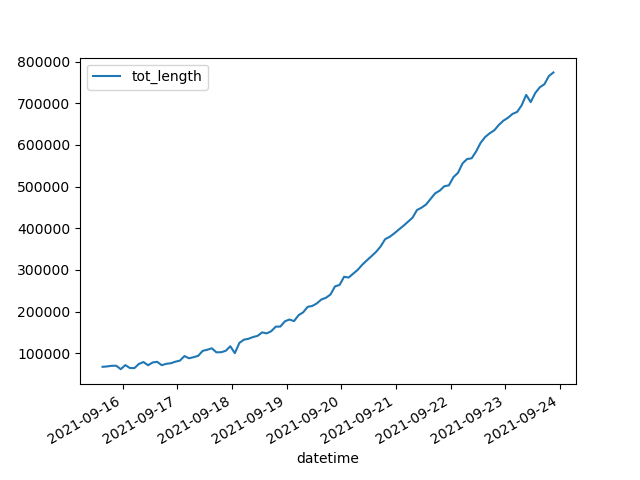

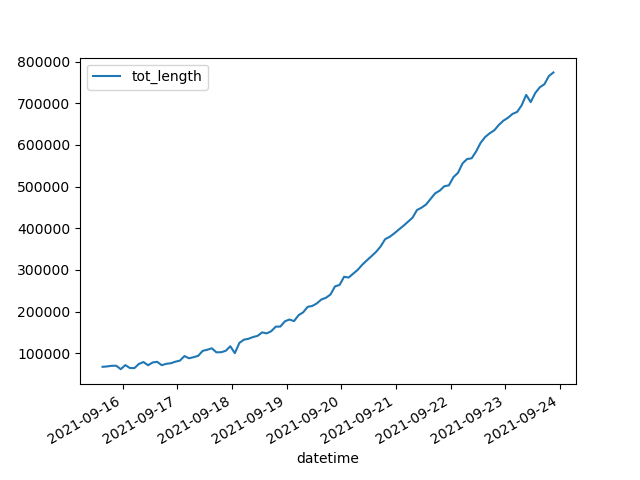

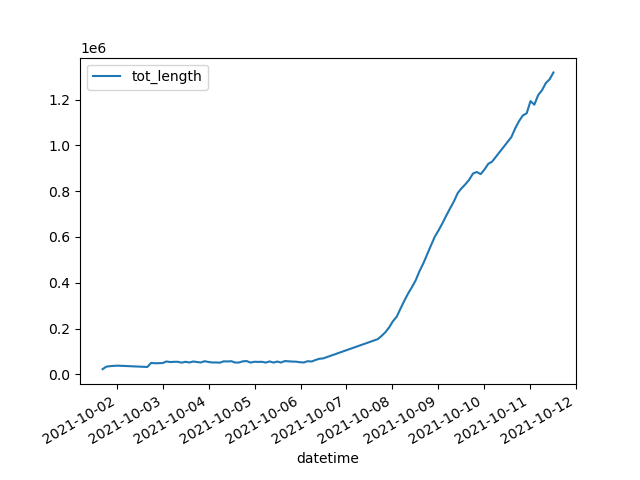

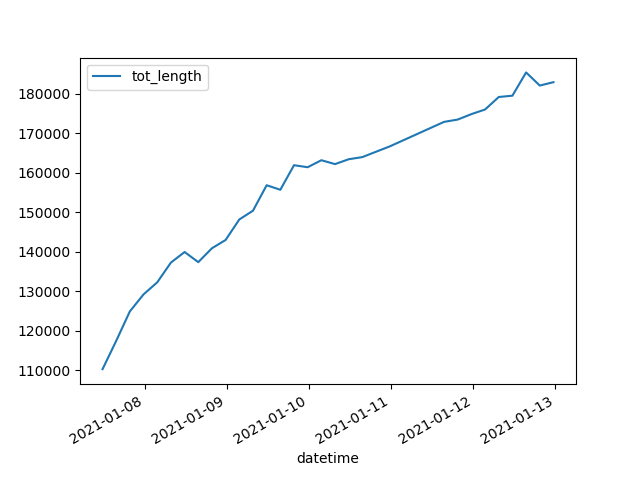

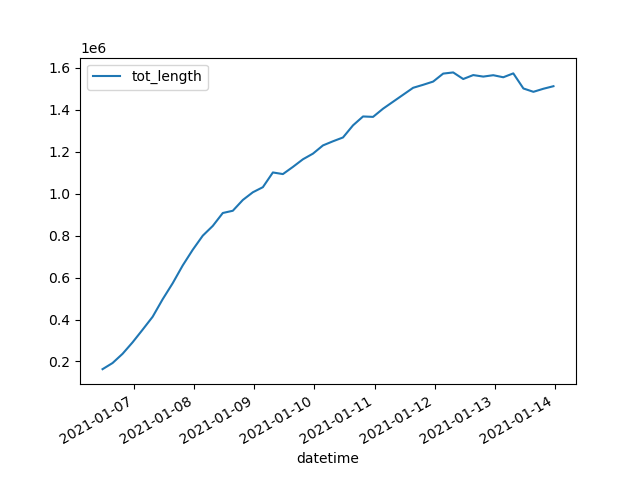

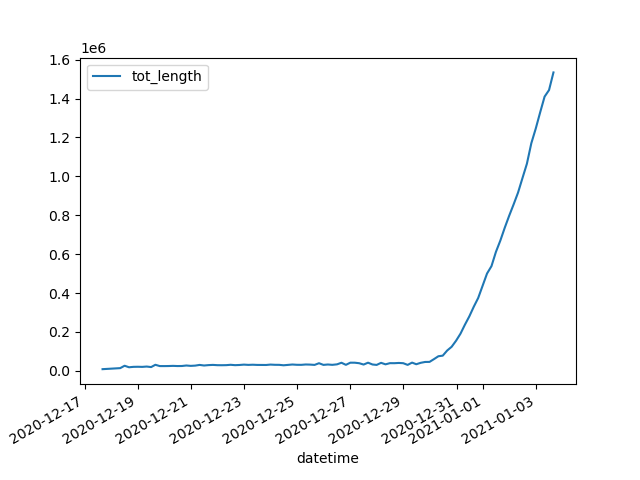

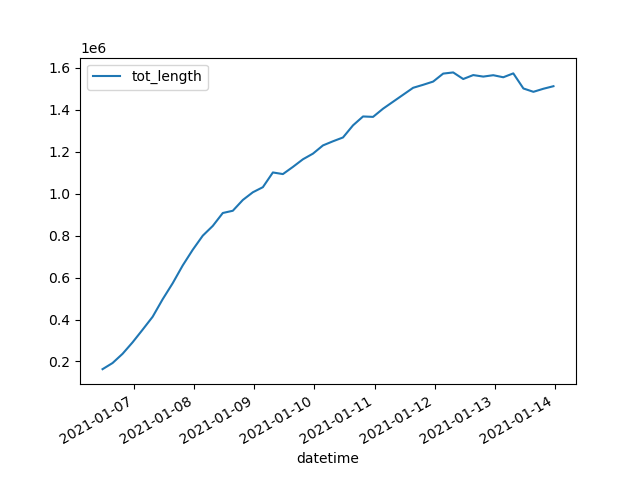

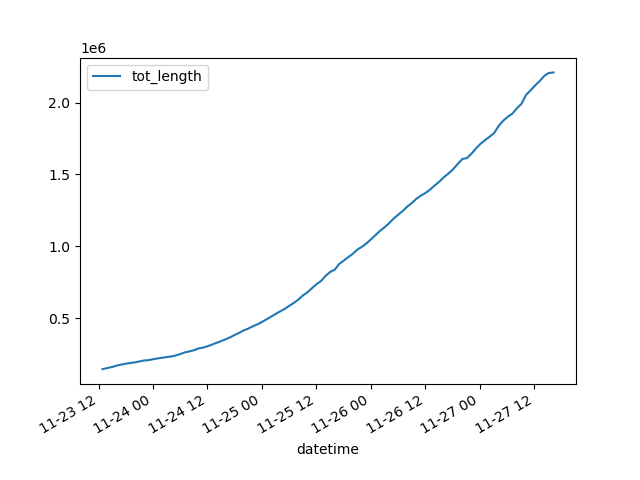

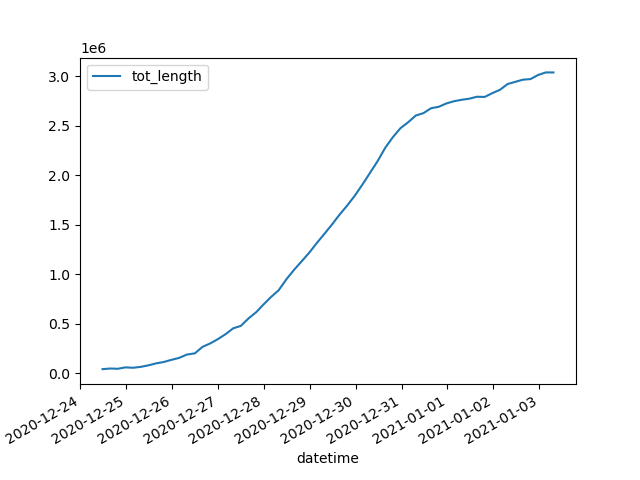

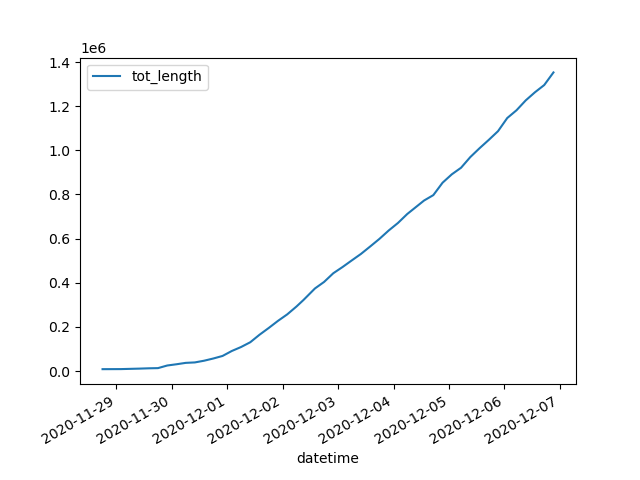

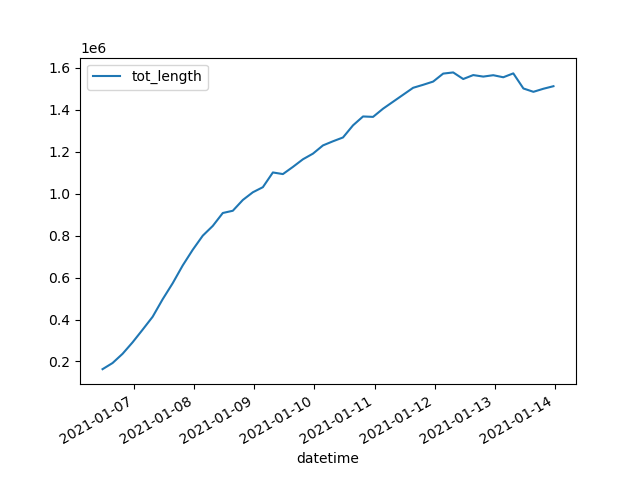

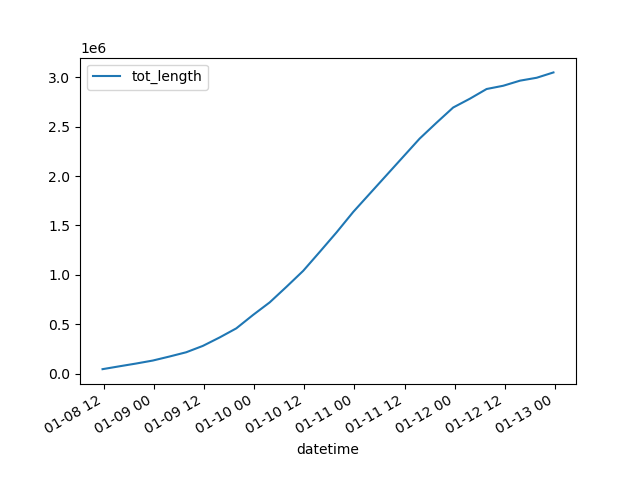

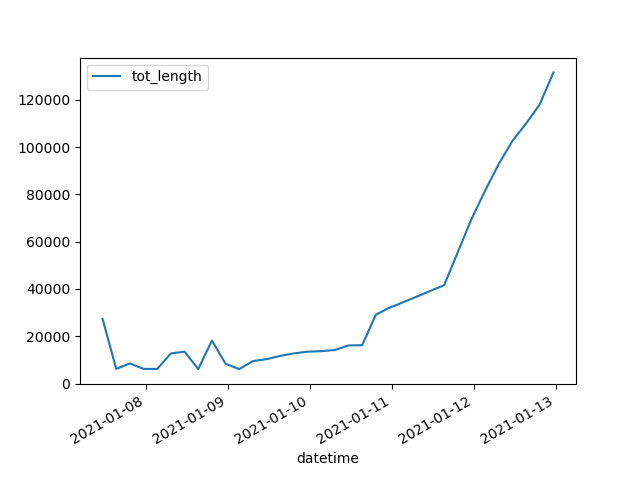

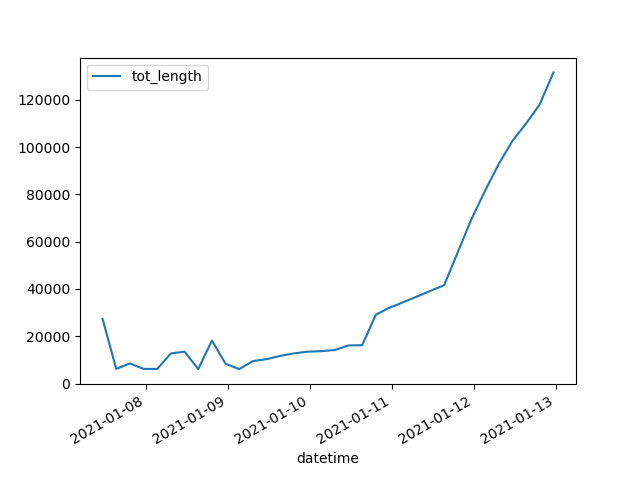

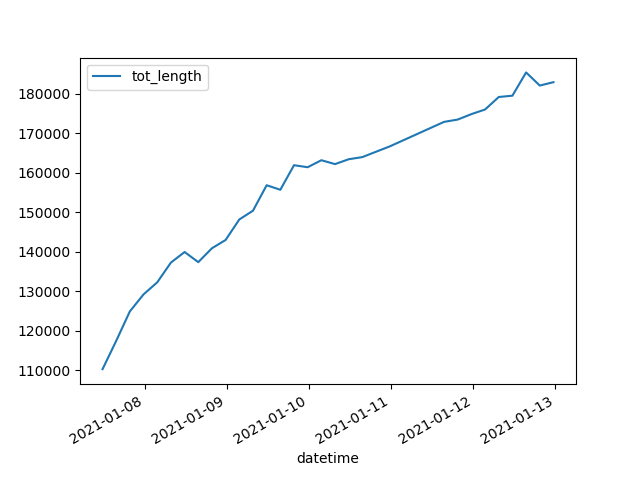

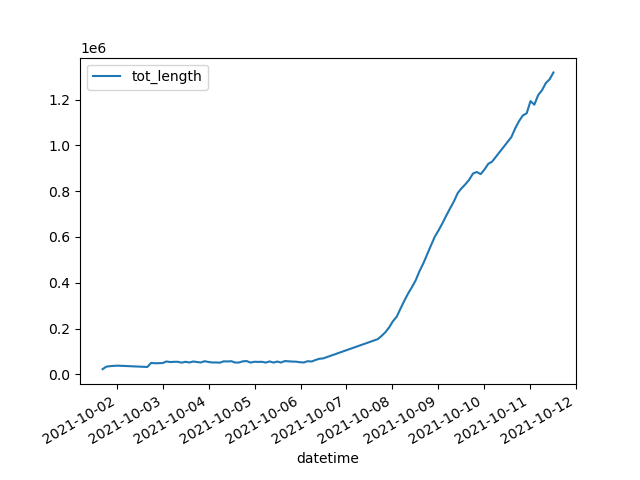

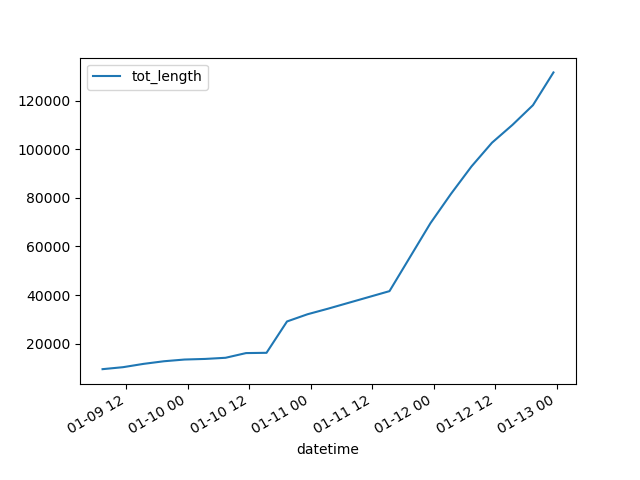

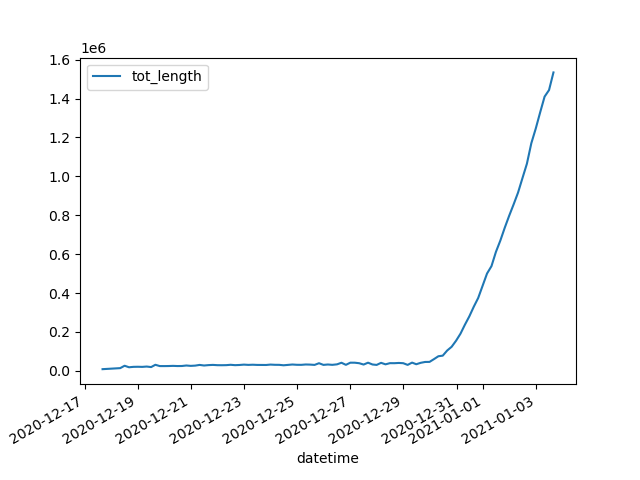

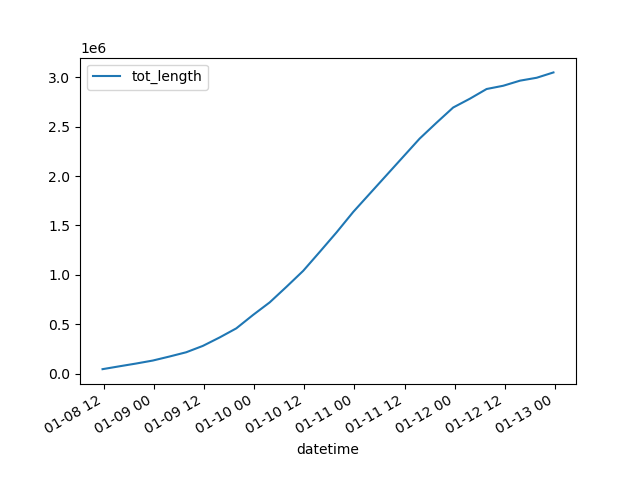

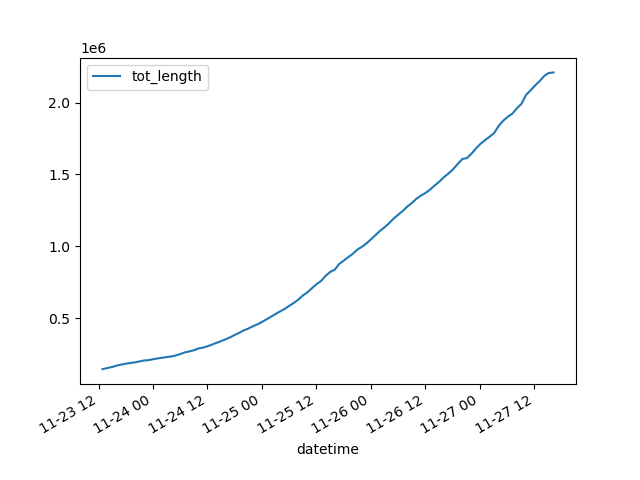

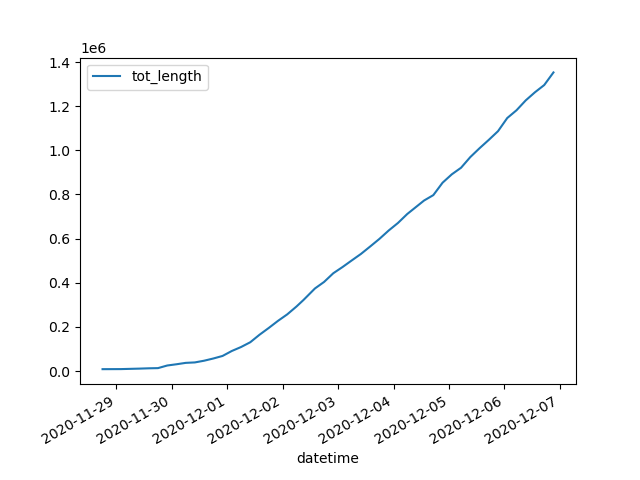

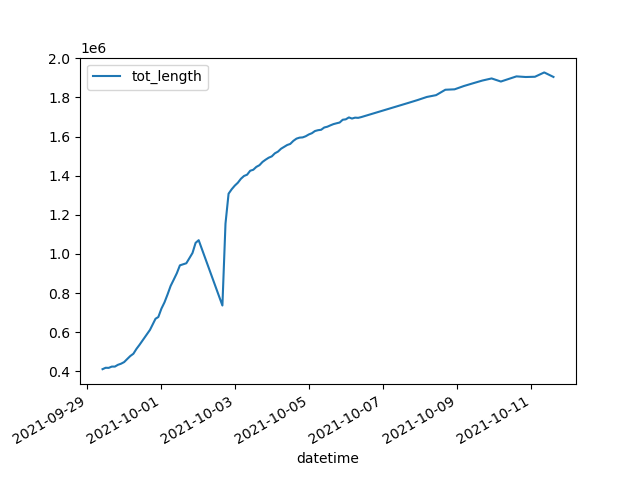

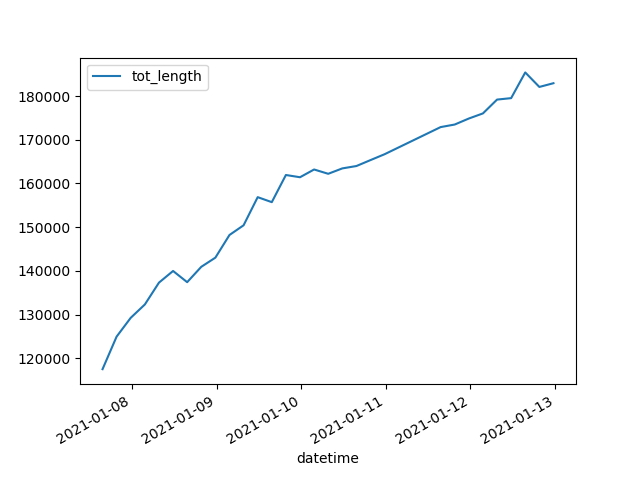

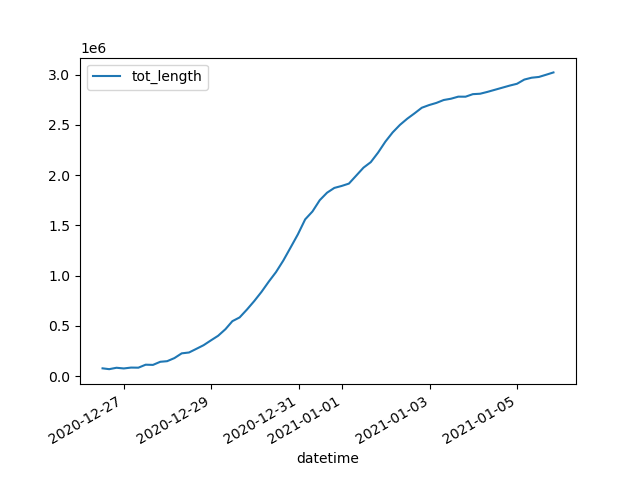

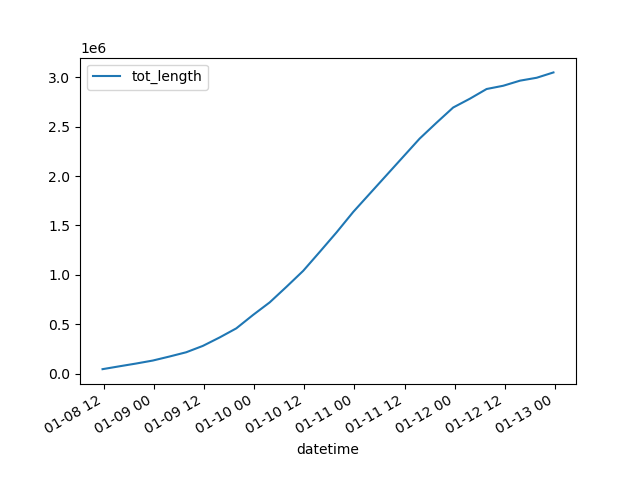

In [32]:
plt.close('all')
for index, row in analysis_info.iterrows():
    folder = row['folder_analysis']
    path_analysis_info = row['path_analysis_info']
    if os.path.isfile(f'{directory}{path_analysis_info}'):
        whole_plate_info = pd.read_json(f'{directory}{path_analysis_info}',
       convert_dates=True).transpose()
        whole_plate_info.index.name = 't'
        whole_plate_info.reset_index(inplace=True)
        whole_plate_info['datetime'] = pd.to_datetime(whole_plate_info['date'], format="%d.%m.%Y, %H:%M:")
        whole_plate_info.plot('datetime','tot_length')
    else:
        print(folder)

In [24]:
whole_plate_info.head()

,t,tot_length,area,num_tips,date,path_exp,path_dynamic_infos,Datetime
0,0,1.04112e+06,651.648,3220,"10.01.2021, 11:44:",Analysis_1635605203774666850_Version1/experime...,Analysis_1635605203774666850_Version1/dynamic_...,2021-01-10 11:44:00
1,1,3.0494e+06,1857.47,11951,"12.01.2021, 23:37:",Analysis_1635605203774666850_Version1/experime...,Analysis_1635605203774666850_Version1/dynamic_...,2021-01-12 23:37:00
2,2,1.63791e+06,897.481,5712,"10.01.2021, 23:43:",Analysis_1635605203774666850_Version1/experime...,Analysis_1635605203774666850_Version1/dynamic_...,2021-01-10 23:43:00
3,3,721759,502.588,2181,"10.01.2021, 03:43:",Analysis_1635605203774666850_Version1/experime...,Analysis_1635605203774666850_Version1/dynamic_...,2021-01-10 03:43:00
4,4,281180,225.401,760,"09.01.2021, 11:43:",Analysis_1635605203774666850_Version1/experime...,Analysis_1635605203774666850_Version1/dynamic_...,2021-01-09 11:43:00


In [ ]:
whole_plate_info['date']

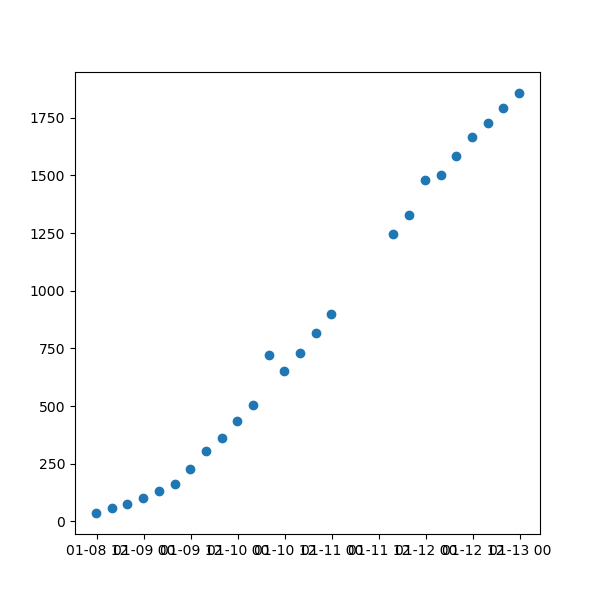

In [28]:
import matplotlib.pyplot as plt
x = whole_plate_info['datetime']
y = whole_plate_info['area']

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.scatter(x,y)

<AxesSubplot:xlabel='datetime'>

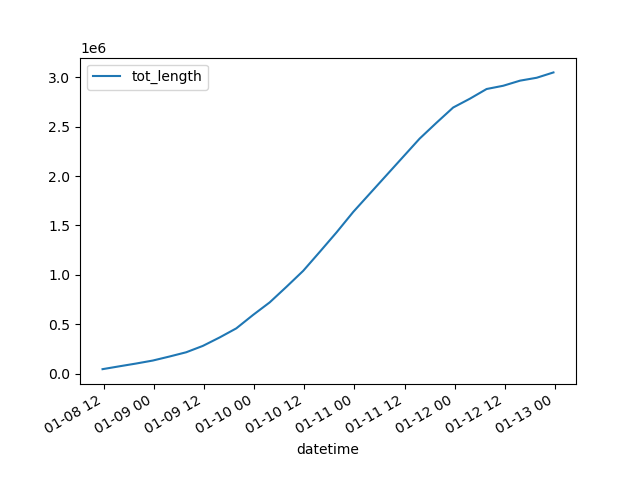

In [31]:
whole_plate_info.plot('datetime','tot_length')

In [23]:
list_f = [get_time,get_speed]
list_args= [{}]*len(list_f)
overwrite = True
for index, row in analysis_info.iterrows():
    path_analysis_info = row['path_analysis_info']
    whole_plate_info = pd.read_json(f'{directory}{path_analysis_info}',
   convert_dates=True).transpose()
    whole_plate_info.index.name = 't'
    whole_plate_info.reset_index(inplace=True)    
    if not os.path.isfile(f'{directory}{path_analysis_info}') or overwrite:
        path_exp = f'{directory}{row["path_exp"]}'
    exp = pickle.load(open(path_exp, "rb"))
    for indext,rowt in whole_plate_info.iterrows():
        path_dynamic_infos = rowt['path_dynamic_infos']
        dynamic_data = json.load(open(f'{directory}{path_dynamic_infos}', 'r')) if os.path.isfile(f'{directory}{path_dynamic_infos}') else {}
        if not os.path.isfile(f'{directory}{path_analysis_info}') or overwrite:
            t = rowt['t']
            tp1 = t+1
            if tp1<exp.ts:
                for hypha in exp.hyphaes:
                    if t in hypha.ts and tp1 in hypha.ts:
                        data_hypha = {}
                        data_hypha['end'] = hypha.end.label
                        for index,f in enumerate(list_f):
                            column,result = f(hypha,t,tp1,list_args[index])
                            data_hypha[column] = result
                    dynamic_data[hypha.end.label] = data_hypha
        with open(f'{directory}{path_analysis_info}', 'w') as jsonf:
            json.dump(plate_level_data, jsonf,  indent=4)
        print(dynamic_data)
        break
    break

failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
not_connected 113 509
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
not_connected 469 452
failure in finding closest edge
{0: {'end': 0, 'time': -84.01666666666667, 'speed': -0.0}, 1: {'end': 0, 'time': -84.01666666666667, 'speed': -0.0}, 8: {'end': 0, 'time': -84.01666666666667, 'speed': -0.0}, 10: {'end': 0, 'time': -84.01666666666667, 'speed': -0.0}, 12: {'end': 12, 'time': -84.01666666666667, 'speed': -0.49249883798143723}, 18: {'end': 18, 'time': -84.01666666666667, 'speed': -0.0}, 19: {'end': 18, 'time': -84.01666666666667, 'speed': -0.0}, 36: {'end': 36, 'time': -84.01666666666667, 'speed': -0.2022132081900212}, 39: {'end': 36, 'time': -84.01666666666667, 'speed': -0.2022132081900212}, 40: {'end': 40, 'time': 

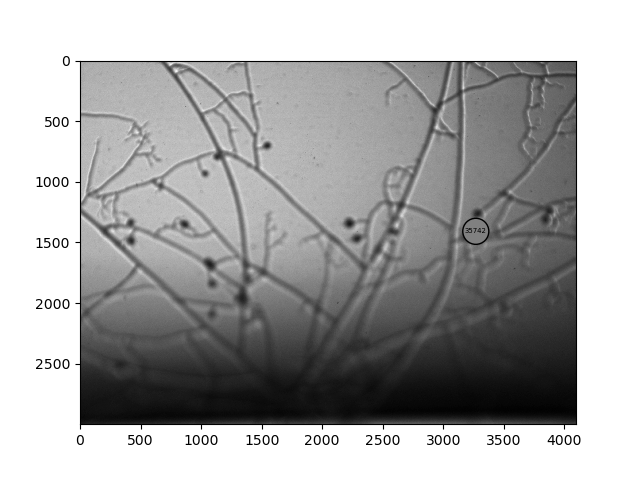

In [19]:
hypha.get_root(t).show_source_image(t,t)

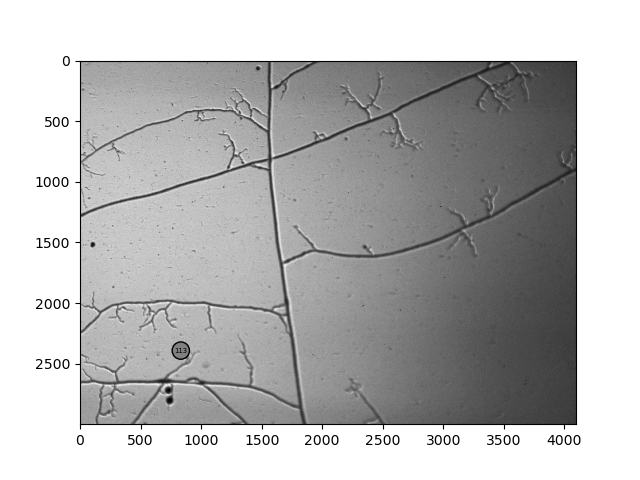

In [20]:
hypha.end.show_source_image(t,t)

In [30]:
f(hypha,t-1,tp1-1,list_args[index])

('time', 92.0)

In [28]:
dynamic_data

{}

In [22]:
from amftrack.pipeline.functions.hyphae_id_surf import get_pixel_growth_and_new_children

def get_time(hypha,t,tp1,args):
    seconds = (hypha.experiment.dates[tp1]-exp.dates[t]).total_seconds()
    return("time",seconds/3600)
def get_speed(hypha,t,tp1,args):
    try:
        pixels,nodes = get_pixel_growth_and_new_children(hypha,t,tp1)
        speed = np.sum([get_length_um(seg) for seg in pixels])/get_time(hypha,t,tp1,None)[1]
        return('speed',speed)
    except:
        print('not_connected',hypha.end.label,hypha.get_root(tp1).label)
        return('speed',None)